#### Task 2: To Explore Unsupervised Machine Learning 
Unsupervised Machine Learning is the opposite of supervised learning in which the there are no labels assign to data instances.Here In this clustering task we will predict the optimum number of clusters and represent it visually For the given ‘Iris’ dataset.

##### import necessary libraray

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### importind Dataset and analysing it.

In [120]:
df = pd.read_csv('iris.csv',index_col=0)
df.drop(['Species'],axis=1,inplace=True)
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 5.9 KB


In [109]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### Data Visualizations

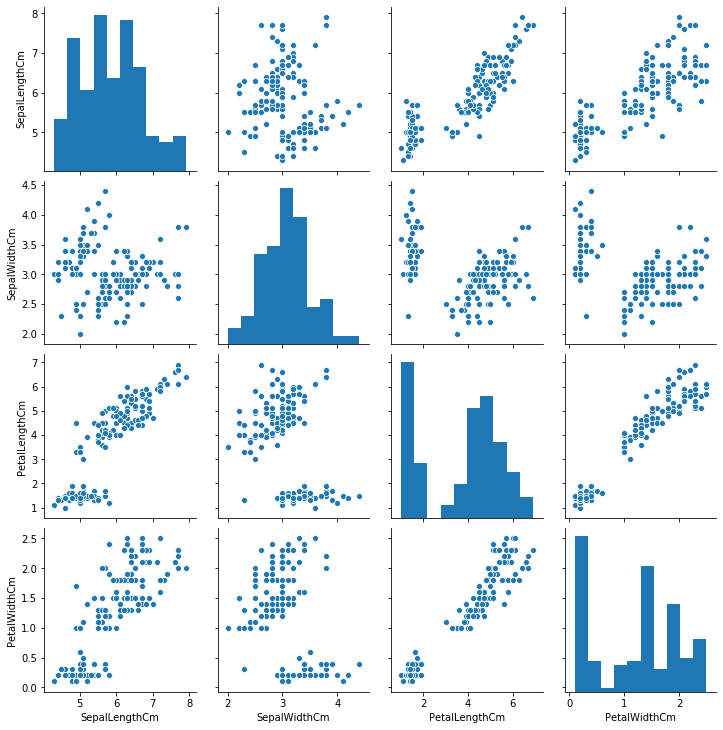

In [110]:
sns.pairplot(df)

##### Finding the optimal number of clusters for our iris dataset.

In [111]:
np.random.seed(42)

x = df.iloc[:,:-1]

from sklearn.cluster import KMeans

wss = []

for i in range(1,11):
    kmean = KMeans(n_clusters=i)
    kmean.fit(x)
    wss.append(kmean.inertia_)

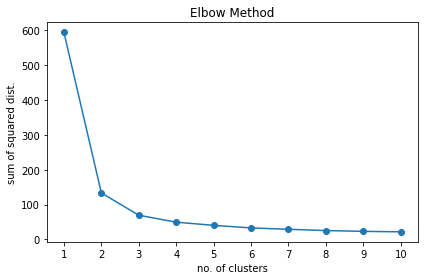

In [112]:
plt.figure()
plt.plot(range(1,11),wss,marker='o')
plt.xticks(range(1,11))
plt.title('Elbow Method')
plt.xlabel('no. of clusters')
plt.ylabel('sum of squared dist.')
plt.tight_layout()
plt.show()

##### predicting the cluster gorup

In [113]:
kmeans = KMeans(n_clusters = 3,random_state=42,algorithm='elkan')
y = kmeans.fit_predict(x)

##### Visualizing clusters

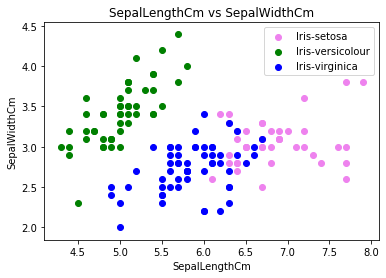

In [118]:
x = df.groupby(y)
g1,g2,g3 = x
fig, ax = plt.subplots()
ax.scatter(g1[1]['SepalLengthCm'].values,g1[1]['SepalWidthCm'].values,c='violet',label='Iris-setosa')
ax.scatter(g2[1]['SepalLengthCm'].values,g2[1]['SepalWidthCm'].values,c='green',label='Iris-versicolour')
ax.scatter(g3[1]['SepalLengthCm'].values,g3[1]['SepalWidthCm'].values,c='blue',label='Iris-virginica')
ax.set(title='SepalLengthCm vs SepalWidthCm',xlabel='SepalLengthCm',ylabel='SepalWidthCm')
ax.legend()

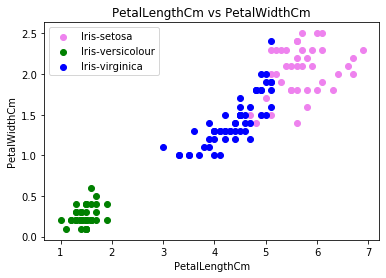

In [119]:
fig, ax = plt.subplots()
ax.scatter(g1[1]['PetalLengthCm'].values,g1[1]['PetalWidthCm'].values,c='violet',label='Iris-setosa')
ax.scatter(g2[1]['PetalLengthCm'].values,g2[1]['PetalWidthCm'].values,c='green',label='Iris-versicolour')
ax.scatter(g3[1]['PetalLengthCm'].values,g3[1]['PetalWidthCm'].values,c='blue',label='Iris-virginica')
ax.set(title='PetalLengthCm vs PetalWidthCm',xlabel='PetalLengthCm',ylabel='PetalWidthCm')
ax.legend()